#第3章　代表的な次元削減を行う10本ノック

## ノック21:PCAを実施してみよう

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.loc[df["target"]==0, "target_name"] = "setosa"
df.loc[df["target"]==1, "target_name"] = "versicolor"
df.loc[df["target"]==2, "target_name"] = "virginica"
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


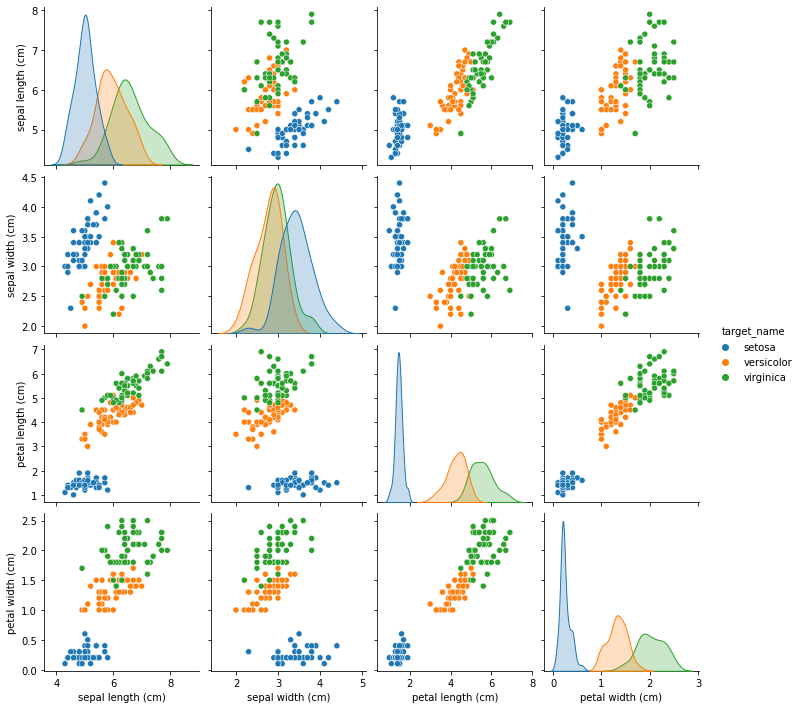

In [2]:
import seaborn as sns
sns.pairplot(df, vars=df.columns[:4], hue="target_name")

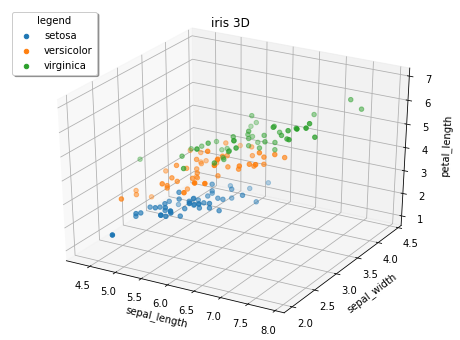

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection="3d")
for c in df["target_name"].unique():
    ax.scatter(df.iloc[:, 0][df["target_name"]==c], df.iloc[:, 1][df["target_name"]==c] , df.iloc[:, 2][df["target_name"]==c], label=c)
ax.set_title("iris 3D") 
ax.set_xlabel("sepal_length") 
ax.set_ylabel("sepal_width")  
ax.set_zlabel("petal_length") 
ax.legend(loc=2, title="legend", shadow=True)  
plt.show()

In [4]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(random_state=0)
X_pc = pca.fit_transform(df.iloc[:, 0:4])
df_pca = pd.DataFrame(X_pc, columns=["PC{}".format(i + 1) for i in range(len(X_pc[0]))])
print("主成分の数: ", pca.n_components_) 
print("保たれている情報: ", np.sum(pca.explained_variance_ratio_))
display(df_pca.head())

主成分の数:  4
保たれている情報:  1.0


,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


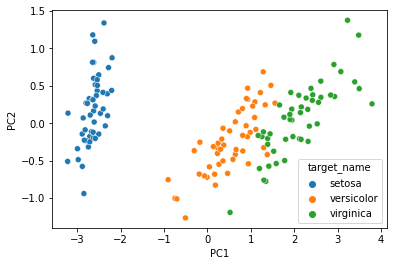

In [5]:
sns.scatterplot(x="PC1", y="PC2", data=df_pca, hue=df["target_name"])

## ノック22:主成分を解釈してみよう

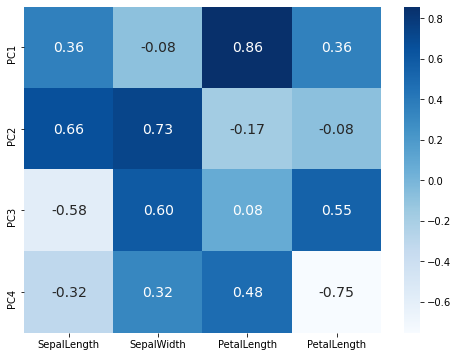

In [6]:
import seaborn as sns
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
sns.heatmap(pca.components_,
           cmap="Blues",
           annot=True,
           annot_kws={"size": 14},
           fmt=".2f",
           xticklabels=["SepalLength", "SepalWidth", "PetalLength", "PetalLength"],
           yticklabels=["PC1", "PC2", "PC3", "PC4"],
           ax=ax)
plt.show()

## ノック23:スクリープロットで次元削減数を探索してみよう

In [7]:
df_wine=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df_wine.columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash","Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols","Proanthocyanins", "Color intensity", "Hue","OD280/OD315 of diluted wines", "Proline"]
display(df_wine.shape)
display(df_wine.head())

(178, 14)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


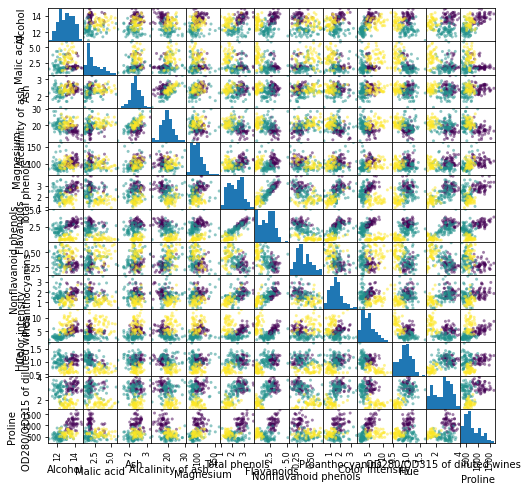

In [8]:
from pandas import plotting
plotting.scatter_matrix(df_wine.iloc[:, 1:], figsize=(8, 8), c=list(df_wine.iloc[:, 0]), alpha=0.5)
plt.show()

In [9]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
sc=preprocessing.StandardScaler()
X = df_wine.iloc[:, 1:]
X_norm=sc.fit_transform(X)
 
pca = PCA(random_state=0)
X_pc = pca.fit_transform(X_norm)
df_pca = pd.DataFrame(X_pc, columns=["PC{}".format(i + 1) for i in range(len(X_pc[0]))])
print("主成分の数: ", pca.n_components_)
print("保たれている情報: ", round(np.sum(pca.explained_variance_ratio_),2))
display(df_pca.head())

主成分の数:  13
保たれている情報:  1.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [10]:
pd.DataFrame(np.round(pca.explained_variance_, 2), index=["PC{}".format(x + 1) for x in range(len(df_pca.columns))], columns=["固有値"])

,固有値
PC1,4.73
PC2,2.51
PC3,1.45
PC4,0.92
PC5,0.86
PC6,0.65
PC7,0.55
PC8,0.35
PC9,0.29
PC10,0.25


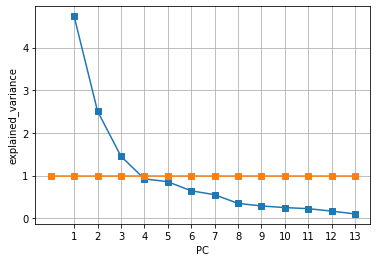

In [11]:
line = np.ones(14)
plt.plot(np.append(np.nan, pca.explained_variance_), "s-")
plt.plot(line, "s-")
plt.xlabel("PC")
plt.ylabel("explained_variance")
plt.xticks( np.arange(1, 14, 1))
plt.grid()
plt.show()

## ノック24:寄与率で次元削減数を探索してみよう

In [12]:
pd.DataFrame(np.round(pca.explained_variance_ratio_,2), index=["PC{}".format(x + 1) for x in range(len(df_pca.columns))], columns=["寄与率"])

,寄与率
PC1,0.36
PC2,0.19
PC3,0.11
PC4,0.07
PC5,0.07
PC6,0.05
PC7,0.04
PC8,0.03
PC9,0.02
PC10,0.02


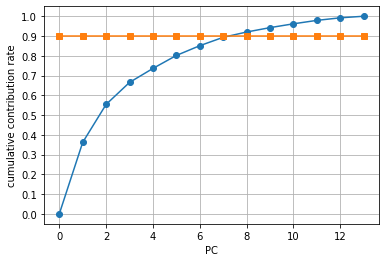

In [13]:
import matplotlib.ticker as ticker
line = np.full(14, 0.9)
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("PC")
plt.ylabel("cumulative contribution rate")
plt.yticks( np.arange(0, 1.1, 0.1))
plt.plot(line, "s-") 
plt.grid()
plt.show()

In [14]:
sc=preprocessing.StandardScaler()
X = df_wine.iloc[:, 1:]
X_norm=sc.fit_transform(X)
 
pca = PCA(n_components=0.9, random_state=0)
X_pc = pca.fit_transform(X_norm)
df_pca = pd.DataFrame(X_pc, columns=["PC{}".format(i + 1) for i in range(len(X_pc[0]))])
print("主成分の数: ", pca.n_components_) 
print("保たれている情報: ", round(np.sum(pca.explained_variance_ratio_),2))
display(df_pca.head())

主成分の数:  8
保たれている情報:  0.92


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700


## ノック25:Isomapで次元削減を実施してみよう

Text(0, 0.5, 'y')

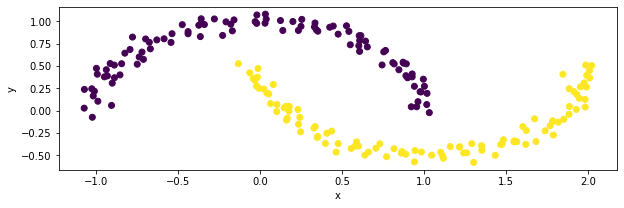

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition, manifold 
from sklearn import datasets
from sklearn.decomposition import PCA
X,Y = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)
plt.figure(figsize=(10,3))
plt.scatter(X[:,0],X[:,1], c=Y)
plt.xlabel("x")
plt.ylabel("y")

In [16]:
pca = PCA(n_components=2)
X_reduced=pca.fit_transform(X_norm)
 
isomap_5 = manifold.Isomap(n_neighbors=5, n_components=2)
X_isomap_5 = isomap_5.fit_transform(X_norm)
 
isomap_10 = manifold.Isomap(n_neighbors=10, n_components=2)
X_isomap_10 = isomap_10.fit_transform(X_norm)

<function matplotlib.pyplot.show>

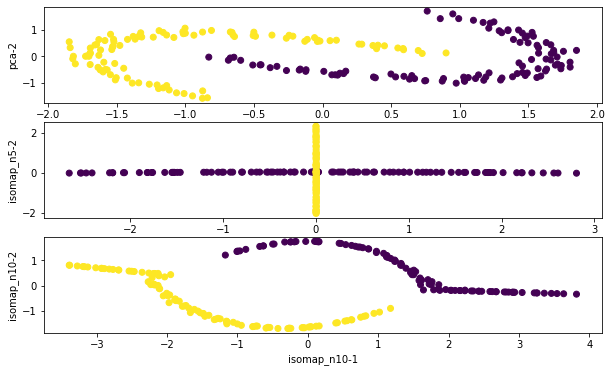

In [17]:
plt.figure(figsize=(10,6))
plt.subplot(3, 1, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y)
plt.xlabel("pca-1")
plt.ylabel("pca-2")
 
plt.subplot(3, 1, 2)
plt.scatter(X_isomap_5[:,0],X_isomap_5[:,1], c=Y)
plt.xlabel("isomap_n5-1")
plt.ylabel("isomap_n5-2")
 
plt.subplot(3, 1, 3)
plt.scatter(X_isomap_10[:,0],X_isomap_10[:,1], c=Y)
plt.xlabel("isomap_n10-1")
plt.ylabel("isomap_n10-2")
plt.show

## ノック26:t-SNEで次元削減を実施してみよう

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
print(digits.data)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


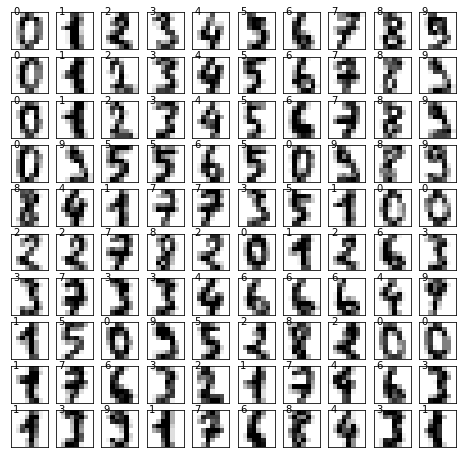

In [19]:
import matplotlib.pyplot as plt 
fig, axes = plt.subplots(10, 10, figsize=(8, 8),subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    ax.text(0, 0, str(digits.target[i]))

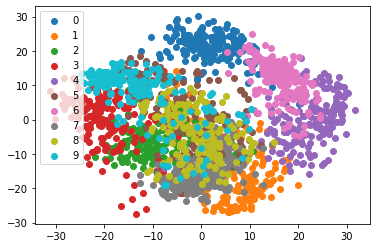

In [20]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=2).fit_transform(digits.data)
for each_label in digits.target_names:
    c_plot_bool = digits.target == each_label
    plt.scatter(X_reduced[c_plot_bool, 0], X_reduced[c_plot_bool, 1], label="{}".format(each_label))
    plt.legend()
plt.show()

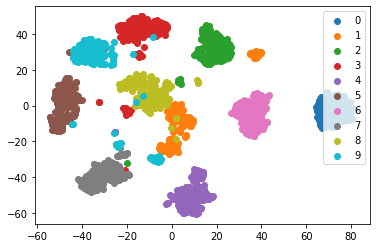

In [21]:
from sklearn.manifold import TSNE
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(digits.data)
for each_label in digits.target_names:
    c_plot_bool = digits.target == each_label
    plt.scatter(X_reduced[c_plot_bool, 0], X_reduced[c_plot_bool, 1], label="{}".format(each_label))
    plt.legend()
plt.show()

## ノック27:t-SNEで最適なPerplexityを探索してみよう

In [22]:
import time
def create_2d_tsne(target_X, y, y_labels, perplexity_list= [2, 5, 30, 50, 100]):
    fig, axes = plt.subplots(nrows=1, ncols=len(perplexity_list),figsize=(5*len(perplexity_list), 4))
    for i, (ax, perplexity) in enumerate(zip(axes.flatten(), perplexity_list)):
        start_time = time.time()
        tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(target_X)
        for each_label in y_labels:
            c_plot_bool = y == each_label
            ax.scatter(Y[c_plot_bool, 0], Y[c_plot_bool, 1], label="{}".format(each_label))
        end_time = time.time()
        ax.legend()
        ax.set_title("perplexity: {}".format(perplexity))
        print("perplexity {} is {:.2f} seconds.".format(perplexity, end_time - start_time))
    plt.show()

perplexity 2 is 9.59 seconds.
perplexity 5 is 9.53 seconds.
perplexity 30 is 12.33 seconds.
perplexity 50 is 14.50 seconds.
perplexity 100 is 19.82 seconds.


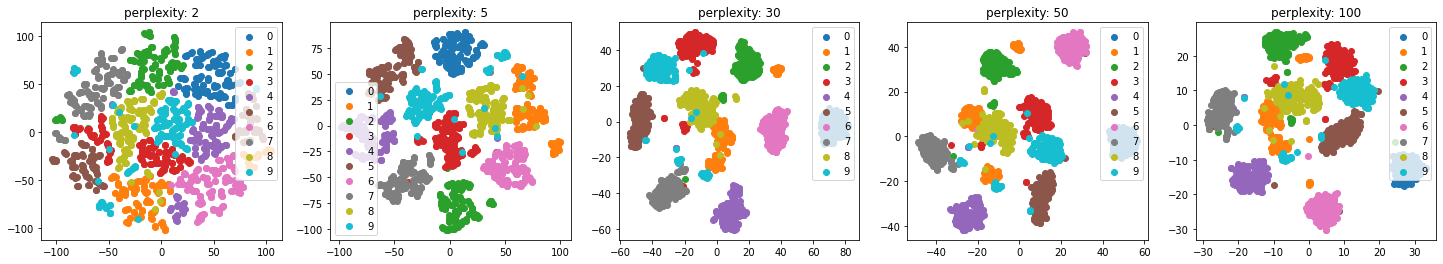

In [23]:
create_2d_tsne(digits.data, digits.target, digits.target_names)

In [24]:
def create_3d_tsne(target_X, y, y_labels, perplexity_list= [2, 5, 30, 50, 100]):
    fig = plt.figure(figsize=(5*len(perplexity_list),4))
    for i, perplexity in enumerate(perplexity_list):
        ax = fig.add_subplot(1, len(perplexity_list), i+1, projection="3d")
        start_time = time.time()
        tsne = TSNE(n_components=3, random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(target_X)
        for each_label in y_labels:
            c_plot_bool = y == each_label
            ax.scatter(Y[c_plot_bool, 0], Y[c_plot_bool, 1], label="{}".format(each_label))
        end_time = time.time()
        ax.legend()
        ax.set_title("Perplexity: {}".format(perplexity))
        print("perplexity {} is {:.2f} seconds.".format(perplexity, end_time - start_time))
    plt.show()

perplexity 2 is 43.59 seconds.
perplexity 5 is 39.65 seconds.
perplexity 30 is 44.41 seconds.
perplexity 50 is 45.09 seconds.
perplexity 100 is 65.77 seconds.


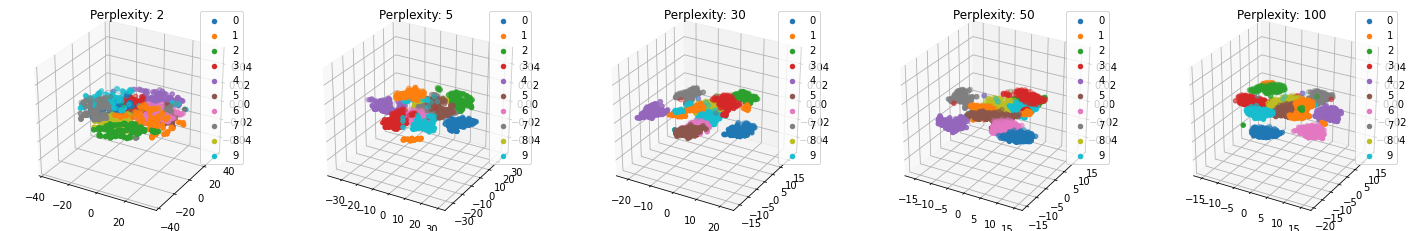

In [25]:
create_3d_tsne(digits.data, digits.target, digits.target_names)

## ノック28:UMAPで次元削減を実施してみよう

In [26]:
!pip3 install umap-learn

     |████████████████████████████████| 80 kB 7.3 MB/s 
     |████████████████████████████████| 1.1 MB 49.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=d4498995768eb2b7234a32a6c811d7d9369965e02212916638a9759d867be4b3
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=4de9cc47dbaa61ef2d1b0c8bc9c5a46deb9f590f045f755d57a2e077222da409
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent


In [27]:
import umap
 
start_time_tsne = time.time()
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(digits.data)
interval_tsne = time.time() - start_time_tsne
 
start_time_umap = time.time()
embedding = umap.UMAP(n_components=2, random_state=0).fit_transform(digits.data)
interval_umap = time.time() - start_time_umap
 
print("tsne : {}s".format(np.round(interval_tsne,2)))
print("umap : {}s".format(np.round(interval_umap,2)))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


tsne : 12.32s
umap : 15.55s


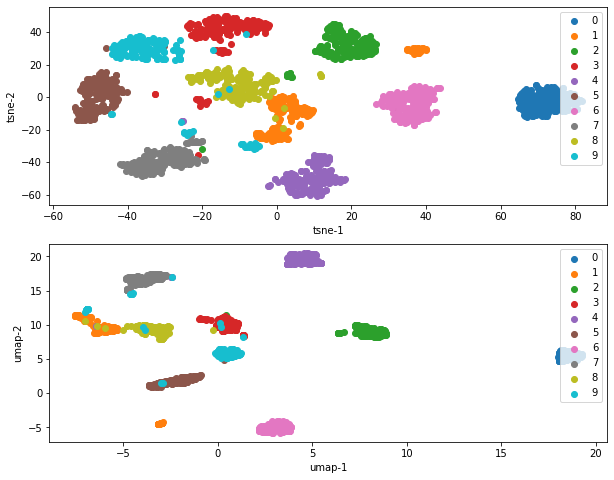

In [28]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
for each_label in digits.target_names:
    c_plot_bool = digits.target == each_label
    plt.scatter(X_reduced[c_plot_bool, 0], X_reduced[c_plot_bool, 1], label="{}".format(each_label))
plt.legend(loc="upper right")
plt.xlabel("tsne-1")
plt.ylabel("tsne-2")
 
plt.subplot(2, 1, 2)
for each_label in digits.target_names:
    c_plot_bool = digits.target == each_label
    plt.scatter(embedding[c_plot_bool, 0], embedding[c_plot_bool, 1], label="{}".format(each_label))
plt.legend(loc="upper right")
plt.xlabel("umap-1")
plt.ylabel("umap-2")
plt.show()

## ノック29:UMAPで最適なn_neighborsを探索してみよう

In [29]:
def create_2d_umap(target_X, y, y_labels, n_neighbors_list= [2, 15, 30, 50, 100]):
    fig, axes = plt.subplots(nrows=1, ncols=len(n_neighbors_list),figsize=(5*len(n_neighbors_list), 4))
    for i, (ax, n_neighbors) in enumerate(zip(axes.flatten(), n_neighbors_list)):
        start_time = time.time()
        mapper = umap.UMAP(n_components=2, random_state=0, n_neighbors=n_neighbors)
        Y = mapper.fit_transform(target_X)
        for each_label in y_labels:
            c_plot_bool = y == each_label
            ax.scatter(Y[c_plot_bool, 0], Y[c_plot_bool, 1], label="{}".format(each_label))
        end_time = time.time()
        ax.legend(loc="upper right")
        ax.set_title("n_neighbors: {}".format(n_neighbors))
        print("n_neighbors {} is {:.2f} seconds.".format(n_neighbors, end_time - start_time))
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


n_neighbors 2 is 25.48 seconds.
n_neighbors 15 is 8.27 seconds.
n_neighbors 30 is 10.21 seconds.
n_neighbors 50 is 10.80 seconds.
n_neighbors 100 is 12.37 seconds.


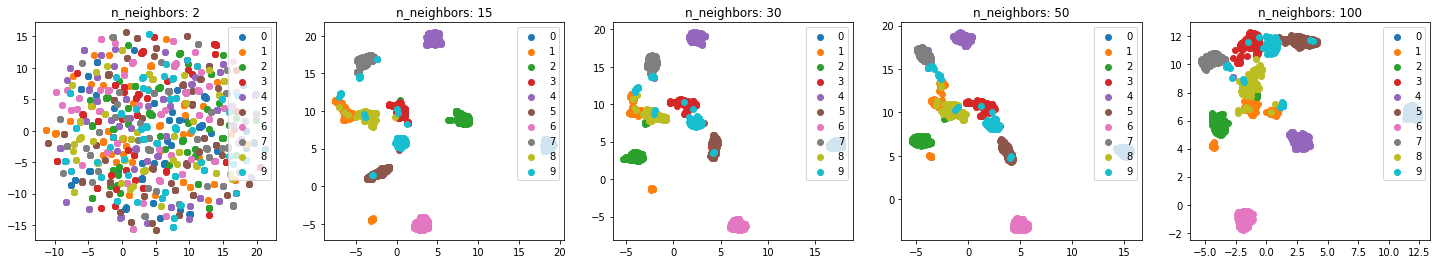

In [30]:
create_2d_umap(digits.data, digits.target, digits.target_names)

In [31]:
def create_3d_umap(target_X, y, y_labels, n_neighbors_list= [2, 15, 30, 50, 100]):
    fig = plt.figure(figsize=(5*len(n_neighbors_list),4))
    for i, n_neighbors in enumerate(n_neighbors_list):
        ax = fig.add_subplot(1, len(n_neighbors_list), i+1, projection="3d")
        start_time = time.time()
        mapper = umap.UMAP(n_components=3, random_state=0, n_neighbors=n_neighbors)
        Y = mapper.fit_transform(target_X)
        for each_label in y_labels:
            c_plot_bool = y == each_label
            ax.scatter(Y[c_plot_bool, 0], Y[c_plot_bool, 1], label="{}".format(each_label))
        end_time = time.time()
        ax.legend(loc="upper right")
        ax.set_title("n_neighbors_list: {}".format(n_neighbors))
        print("n_neighbors_list {} is {:.2f} seconds.".format(n_neighbors, end_time - start_time))
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


n_neighbors_list 2 is 24.27 seconds.
n_neighbors_list 15 is 9.43 seconds.
n_neighbors_list 30 is 10.11 seconds.
n_neighbors_list 50 is 11.26 seconds.
n_neighbors_list 100 is 13.01 seconds.


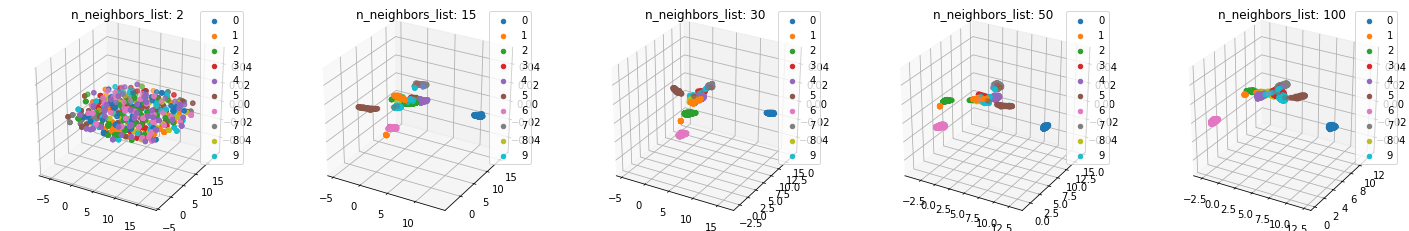

In [32]:
create_3d_umap(digits.data, digits.target, digits.target_names)

n_neighbors_list 10 is 7.84 seconds.
n_neighbors_list 15 is 8.54 seconds.
n_neighbors_list 20 is 9.17 seconds.
n_neighbors_list 25 is 10.11 seconds.
n_neighbors_list 30 is 10.05 seconds.


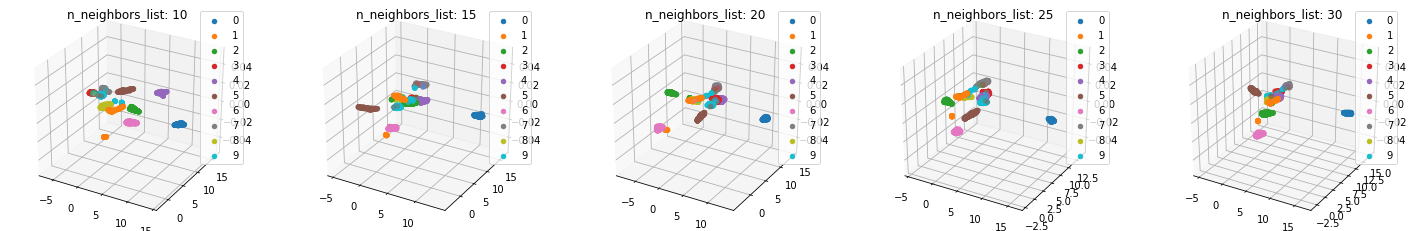

In [33]:
create_3d_umap(digits.data, digits.target, digits.target_names, [10 , 15, 20, 25, 30])

## ノック30:PCAとUMAPを組み合わせて次元削減を実施してみよう

In [34]:
pca = PCA(n_components=0.99, random_state=0)
X_pc = pca.fit_transform(digits.data)
df_pca = pd.DataFrame(X_pc, columns=["PC{}".format(i + 1) for i in range(len(X_pc[0]))])
print("主成分の数: ", pca.n_components_) 
print("保たれている情報: ", np.sum(pca.explained_variance_ratio_))
display(df_pca.head())

主成分の数:  41
保たれている情報:  0.9901018242795546


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41
0,-1.259466,21.274883,-9.463055,13.014189,-7.128823,-7.440659,3.252837,2.553470,-0.581842,3.625697,2.585957,1.551607,0.854497,-3.338749,5.906590,2.743593,0.419837,-0.898150,0.702611,-3.462119,2.680850,1.009450,2.009703,1.295315,1.178879,2.300582,3.670721,-0.943669,-1.132502,2.359796,-1.817386,-0.755016,0.162842,-2.112977,1.094823,0.195686,-0.089994,-2.763741,1.088883,0.206004,1.704511
1,7.957611,-20.768699,4.439506,-14.893664,5.896249,-6.485622,2.126228,-4.615936,3.587450,-1.074705,-5.385715,-2.129511,-2.555324,-6.516996,-2.291764,-2.134027,-5.839357,4.478446,-1.955703,-5.255708,-1.205777,-4.838902,0.860251,-2.974439,5.288817,0.119213,2.182618,-0.510227,2.313549,0.759648,0.645476,1.290907,-2.154407,0.166806,3.191428,-1.532268,-3.688113,2.073790,-0.230846,0.722354,-1.552377
2,6.991923,-9.955986,2.958558,-12.288302,-18.126023,-4.507664,1.843122,-16.415200,0.719233,4.255805,-1.233374,-0.383791,0.208885,6.841040,-1.679690,-4.276003,6.728485,1.269848,0.184780,8.731076,4.951115,-2.465109,5.999388,0.105727,-3.062671,0.166046,4.228821,2.157657,0.837958,-0.542254,4.348027,0.450445,0.341085,-0.505617,-2.808245,-1.253872,-0.220568,0.038202,1.108652,3.285183,1.450043
3,-15.906105,3.332464,9.824372,-12.275838,6.965169,1.089483,-1.042085,10.973556,-3.259735,6.498753,-5.066853,2.396152,2.653396,-4.538297,0.798339,1.646645,-2.249089,-1.403457,3.068280,-3.876889,0.269413,3.623236,2.538124,-1.354896,-1.740973,-1.340244,-5.846014,4.682220,-1.113042,2.839332,0.619232,2.086400,3.220693,-0.826725,-1.392380,2.075339,-1.291333,1.963138,1.893076,0.675706,-0.837613
4,23.306867,4.269061,-5.675129,-13.851524,-0.358124,-2.857574,-0.720497,13.041696,-3.835413,13.414164,2.673319,-1.755831,-5.285637,1.515267,-0.666908,-6.412871,-9.514895,-1.975814,-3.065115,5.035236,0.206830,5.740696,-7.611946,3.991408,2.781007,-0.166739,0.484305,0.627979,-3.287348,-0.396514,-1.856691,0.405450,-0.079859,1.284010,1.015915,3.805724,0.627322,-0.159870,-2.986691,-0.397633,0.064666


n_neighbors 5 is 6.24 seconds.
n_neighbors 10 is 7.99 seconds.
n_neighbors 15 is 8.28 seconds.


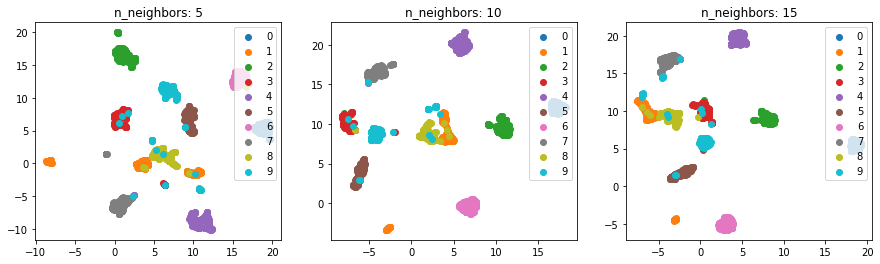

n_neighbors 5 is 6.17 seconds.
n_neighbors 10 is 7.44 seconds.
n_neighbors 15 is 8.76 seconds.


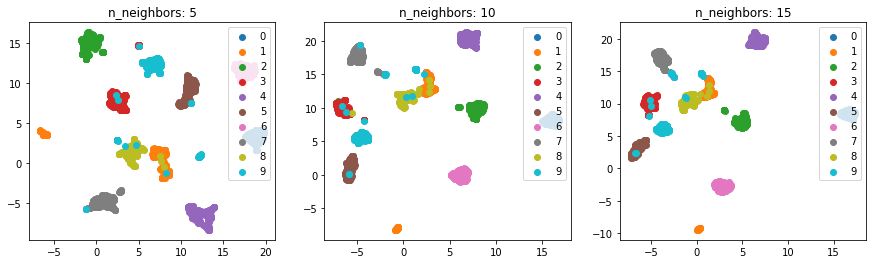

In [35]:
create_2d_umap(digits.data, digits.target, digits.target_names, [5,10,15])
create_2d_umap(df_pca, digits.target, digits.target_names, [5,10,15])